In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import data_preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import make_scorer, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

In [3]:
df_process = pd.read_csv('rentfaster.csv')
df = data_preprocessing.process_data(df_process)
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Calculate the median
median_price = df['price'].median()

y_true = df['price']
y_pred = np.full_like(y_true, median_price)

# Compute the absolute errors
absolute_errors = np.abs(y_true - y_pred)

mean_error = np.mean(absolute_errors)
std_error = np.std(absolute_errors)

# Print the results
print(f"Mean Absolute Error: {mean_error}")
print(f"Standard Deviation of Absolute Errors: {std_error}")

Mean Absolute Error: 630.829807535602
Standard Deviation of Absolute Errors: 748.1753290797093


In [4]:
# Calculate the required test set size
test_size = 0.3
X = df.drop(columns=['price'])
y = df['price']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Print the resulting sizes of the training and test sets
print(f"Proportion of test size: {test_size:.4f}")
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Proportion of test size: 0.3000
Training set size: 18039
Test set size: 7732


In [5]:
# Create a pipeline for scaling and fitting a linear regression model
linear_regression_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('regressor', LinearRegression()) 
])

linear_regression_pipeline.fit(X_train, y_train)

# Output the fitted model
print("Model coefficients:", linear_regression_pipeline.named_steps['regressor'].coef_)
print("Model intercept:", linear_regression_pipeline.named_steps['regressor'].intercept_)

Model coefficients: [  53.99567092  -90.85270625  -22.91876254 -555.20147159 -251.36061125
   63.2494561  -171.62608205  235.49306397  361.71762197  116.77230904
   73.9439493    23.01819099   21.3809247    21.9568224    76.83036353]
Model intercept: 2155.6185065691006


In [6]:
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(linear_regression_pipeline, X_train, y_train, cv=5, scoring=mae_scorer)
cv_scores = -cv_scores

# Calculate the mean and standard deviation
mean_cv_mae = np.mean(cv_scores)
std_cv_mae = np.std(cv_scores)

# Print the cross-validation results
print(f"5-Fold Cross-Validated MAE Scores: {cv_scores}")
print(f"Mean MAE: {mean_cv_mae}")
print(f"Standard Deviation of MAE: {std_cv_mae}")

5-Fold Cross-Validated MAE Scores: [424.00433205 425.03882566 424.69593798 453.1802471  422.18496266]
Mean MAE: 429.8208610892336
Standard Deviation of MAE: 11.721199334684517


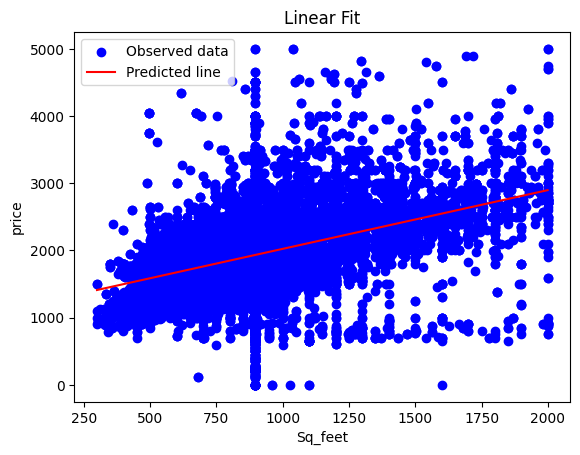

Training rsquared is  0.17345192780533447


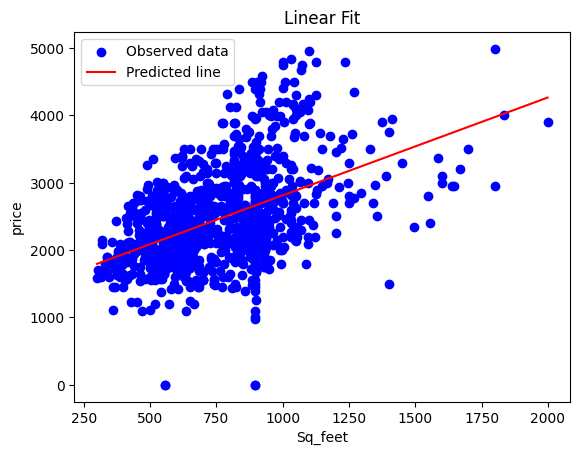

Training rsquared is  0.2175168497122576


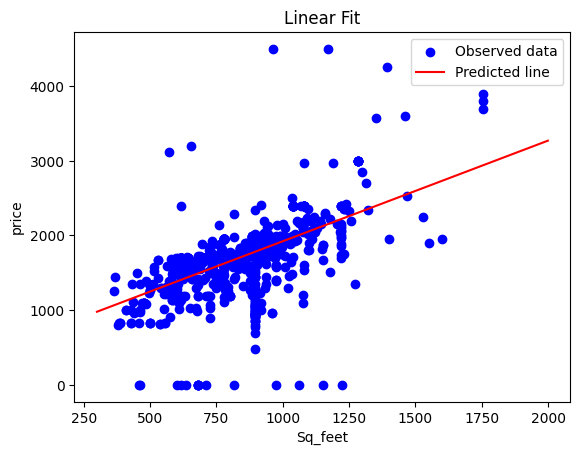

Training rsquared is  0.3122888632794949


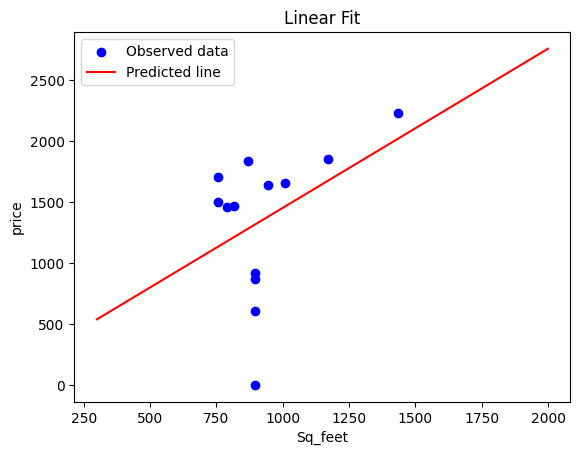

Training rsquared is  0.1624965996228448


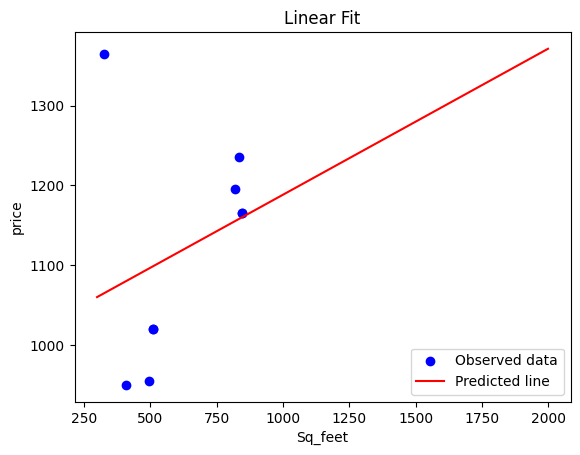

Training rsquared is  0.07553440440880543


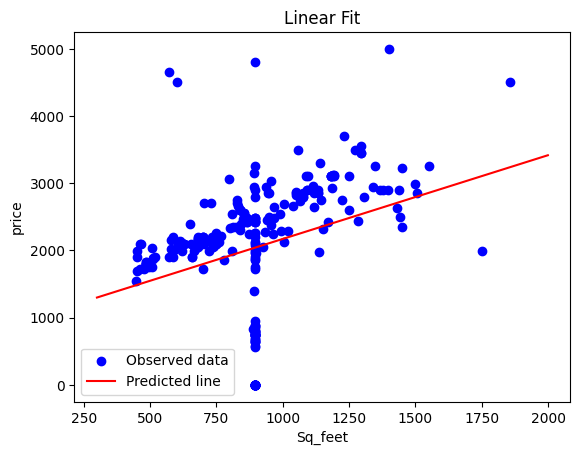

Training rsquared is  0.09217204859049244


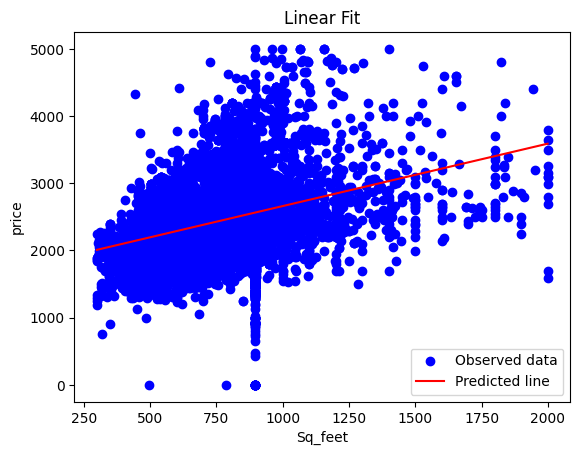

Training rsquared is  0.1061835882588349


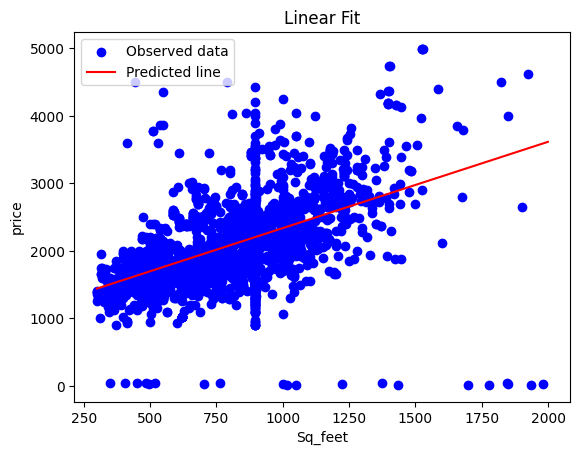

Training rsquared is  0.2567198760410595


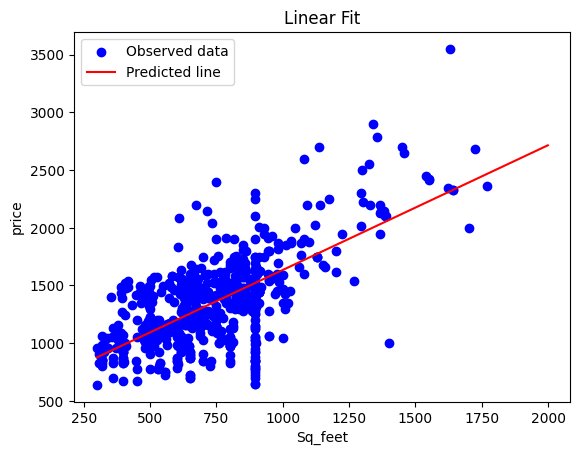

Training rsquared is  0.4477285940317911


In [7]:
for i in range(0, 10):
    if i == 5:
        continue
    filtered_df = df[(df['sq_feet'] >= 300) & (df['sq_feet'] <= 2000) & (df['price'] <= 5000) & (df['province'] == i)]
    X = filtered_df[['sq_feet']].values 
    y = filtered_df['price'].values
    # Make linear regression object and fit the model 
    model = LinearRegression()
    model.fit(X, y)

    # Make the scatter plot 
    plt.scatter(filtered_df['sq_feet'], filtered_df['price'], color='blue', label='Observed data')

    #Generate and plot the predicted values
    sq_feet = np.arange(300, 2000).reshape(-1, 1)
    predicted_price = model.predict(sq_feet)
    # Calculate residuals, R2 and print it  
    predicted_train = model.predict(X)
    residuals = y - predicted_train
    r_squared = r2_score(y, predicted_train)

    plt.plot(sq_feet, predicted_price, color='red', label='Predicted line')
    plt.xlabel('Sq_feet')
    plt.ylabel('price')
    plt.title('Linear Fit')
    plt.legend()
    plt.show()
    print('Training rsquared is ',r_squared)

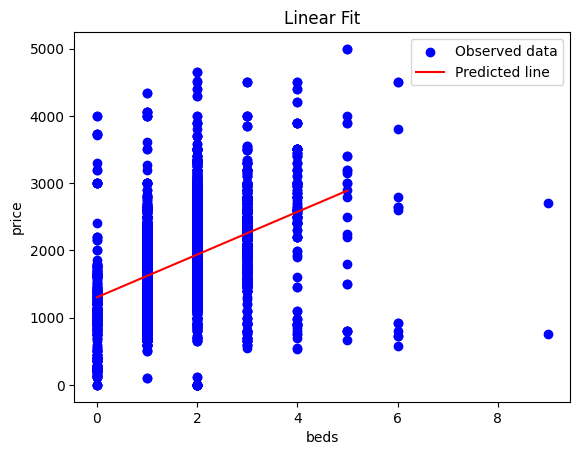

Training rsquared is  0.1826221232929114


In [8]:
filtered_df = df[(df['sq_feet'] >= 500) & (df['sq_feet'] <= 1000) & (df['province'] ==0) & (df['price'] <=5000)]
X = filtered_df[['beds']].values 
y = filtered_df['price'].values
# Make linear regression object and fit the model 
model = LinearRegression()
model.fit(X, y)

# Make the scatter plot 
plt.scatter(filtered_df['beds'], filtered_df['price'], color='blue', label='Observed data')

#Generate and plot the predicted values
sq_feet = np.arange(0, 6).reshape(-1, 1)
predicted_price = model.predict(sq_feet)
# Calculate residuals, R2 and print it  
predicted_train = model.predict(X)
residuals = y - predicted_train
r_squared = r2_score(y, predicted_train)

plt.plot(sq_feet, predicted_price, color='red', label='Predicted line')
plt.xlabel('beds')
plt.ylabel('price')
plt.title('Linear Fit')
plt.legend()
plt.show()
print('Training rsquared is ',r_squared)

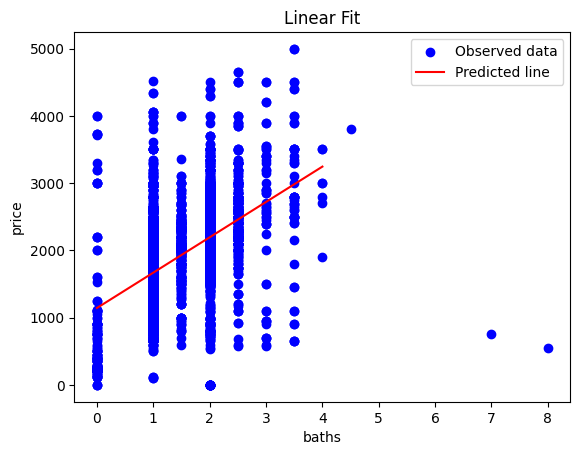

Training rsquared is  0.24721779187415804


In [9]:
filtered_df = df[(df['sq_feet'] >= 500) & (df['sq_feet'] <= 1000) & (df['province'] ==0) & (df['price'] <=5000)]
X = filtered_df[['baths']].values 
y = filtered_df['price'].values
# Make linear regression object and fit the model 
model = LinearRegression()
model.fit(X, y)

# Make the scatter plot 
plt.scatter(filtered_df['baths'], filtered_df['price'], color='blue', label='Observed data')

#Generate and plot the predicted values
sq_feet = np.arange(0, 5).reshape(-1, 1)
predicted_price = model.predict(sq_feet)
# Calculate residuals, R2 and print it  
predicted_train = model.predict(X)
residuals = y - predicted_train
r_squared = r2_score(y, predicted_train)

plt.plot(sq_feet, predicted_price, color='red', label='Predicted line')
plt.xlabel('baths')
plt.ylabel('price')
plt.title('Linear Fit')
plt.legend()
plt.show()
print('Training rsquared is ',r_squared)

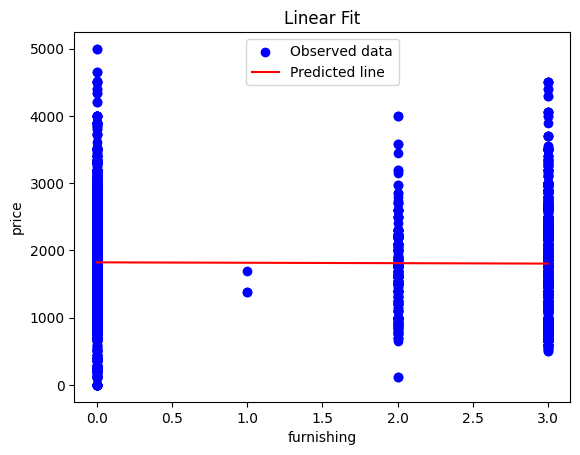

Training rsquared is  0.00011922358637606045


In [10]:
filtered_df = df[(df['sq_feet'] >= 500) & (df['sq_feet'] <= 1000) & (df['province'] ==0) & (df['price'] <=5000)]
X = filtered_df[['furnishing']].values 
y = filtered_df['price'].values
# Make linear regression object and fit the model 
model = LinearRegression()
model.fit(X, y)

# Make the scatter plot 
plt.scatter(filtered_df['furnishing'], filtered_df['price'], color='blue', label='Observed data')

#Generate and plot the predicted values
sq_feet = np.arange(0, 4).reshape(-1, 1)
predicted_price = model.predict(sq_feet)
# Calculate residuals, R2 and print it  
predicted_train = model.predict(X)
residuals = y - predicted_train
r_squared = r2_score(y, predicted_train)

plt.plot(sq_feet, predicted_price, color='red', label='Predicted line')
plt.xlabel('furnishing')
plt.ylabel('price')
plt.title('Linear Fit')
plt.legend()
plt.show()
print('Training rsquared is ',r_squared)

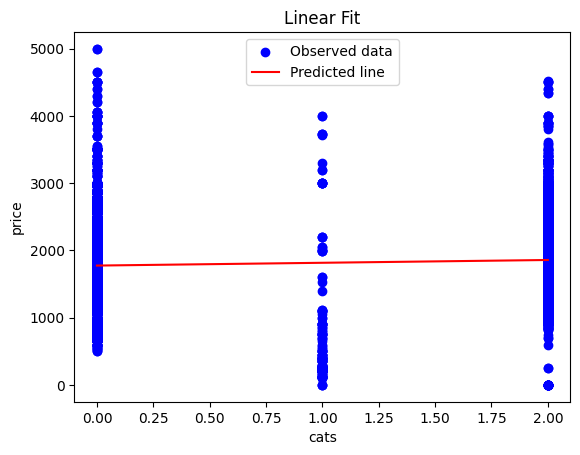

Training rsquared is  0.005003856139462748


In [11]:
filtered_df = df[(df['sq_feet'] >= 500) & (df['sq_feet'] <= 1000) & (df['province'] ==0) & (df['price'] <=5000)]
X = filtered_df[['cats']].values 
y = filtered_df['price'].values
# Make linear regression object and fit the model 
model = LinearRegression()
model.fit(X, y)

# Make the scatter plot 
plt.scatter(filtered_df['cats'], filtered_df['price'], color='blue', label='Observed data')

#Generate and plot the predicted values
sq_feet = np.arange(0, 3).reshape(-1, 1)
predicted_price = model.predict(sq_feet)
# Calculate residuals, R2 and print it  
predicted_train = model.predict(X)
residuals = y - predicted_train
r_squared = r2_score(y, predicted_train)

plt.plot(sq_feet, predicted_price, color='red', label='Predicted line')
plt.xlabel('cats')
plt.ylabel('price')
plt.title('Linear Fit')
plt.legend()
plt.show()
print('Training rsquared is ',r_squared)

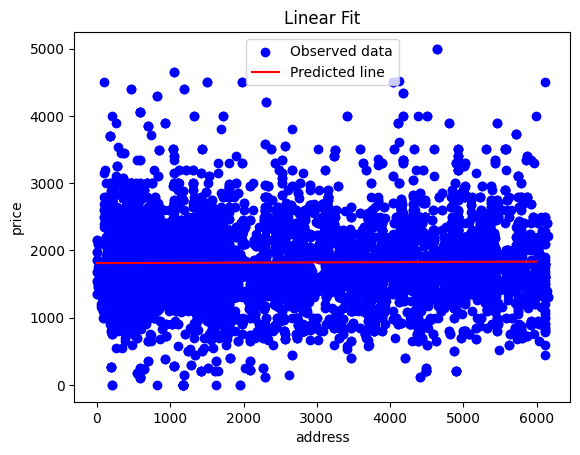

Training rsquared is  0.0001420042845891034


In [27]:
filtered_df = df[(df['sq_feet'] >= 500) & (df['sq_feet'] <= 1000) & (df['province'] ==0) & (df['price'] <=5000)]
X = filtered_df[['address']].values 
y = filtered_df['price'].values
# Make linear regression object and fit the model 
model = LinearRegression()
model.fit(X, y)

# Make the scatter plot 
plt.scatter(filtered_df['address'], filtered_df['price'], color='blue', label='Observed data')

#Generate and plot the predicted values
sq_feet = np.arange(0, 6000).reshape(-1, 1)
predicted_price = model.predict(sq_feet)
# Calculate residuals, R2 and print it  
predicted_train = model.predict(X)
residuals = y - predicted_train
r_squared = r2_score(y, predicted_train)

plt.plot(sq_feet, predicted_price, color='red', label='Predicted line')
plt.xlabel('address')
plt.ylabel('price')
plt.title('Linear Fit')
plt.legend()
plt.show()
print('Training rsquared is ',r_squared)

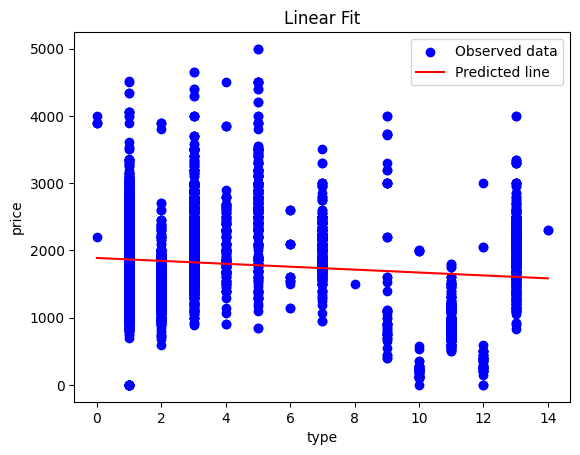

Training rsquared is  0.015774674657991872


In [13]:
filtered_df = df[(df['sq_feet'] >= 500) & (df['sq_feet'] <= 1000) & (df['province'] ==0) & (df['price'] <=5000)]
X = filtered_df[['type']].values 
y = filtered_df['price'].values
# Make linear regression object and fit the model 
model = LinearRegression()
model.fit(X, y)

# Make the scatter plot 
plt.scatter(filtered_df['type'], filtered_df['price'], color='blue', label='Observed data')

#Generate and plot the predicted values
sq_feet = np.arange(0, 15).reshape(-1, 1)
predicted_price = model.predict(sq_feet)
# Calculate residuals, R2 and print it  
predicted_train = model.predict(X)
residuals = y - predicted_train
r_squared = r2_score(y, predicted_train)

plt.plot(sq_feet, predicted_price, color='red', label='Predicted line')
plt.xlabel('type')
plt.ylabel('price')
plt.title('Linear Fit')
plt.legend()
plt.show()
print('Training rsquared is ',r_squared)

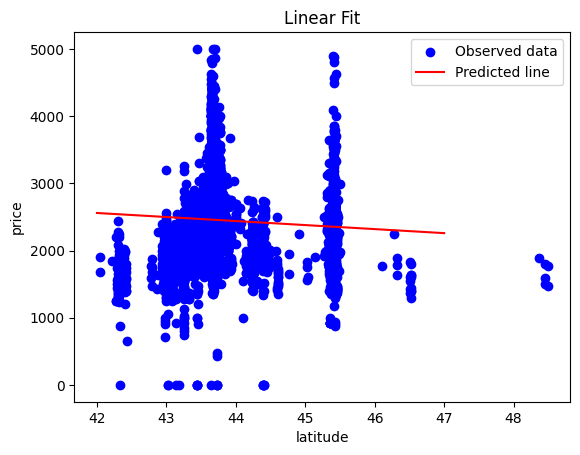

Training rsquared is  0.005558479452565157


In [22]:
filtered_df = df[(df['sq_feet'] >= 500) & (df['sq_feet'] <= 1000) & (df['province'] ==7) & (df['price'] <=5000)]
X = filtered_df[['latitude']].values 
y = filtered_df['price'].values
# Make linear regression object and fit the model 
model = LinearRegression()
model.fit(X, y)

# Make the scatter plot 
plt.scatter(filtered_df['latitude'], filtered_df['price'], color='blue', label='Observed data')

#Generate and plot the predicted values
sq_feet = np.arange(42, 48).reshape(-1, 1)
predicted_price = model.predict(sq_feet)
# Calculate residuals, R2 and print it  
predicted_train = model.predict(X)
residuals = y - predicted_train
r_squared = r2_score(y, predicted_train)

plt.plot(sq_feet, predicted_price, color='red', label='Predicted line')
plt.xlabel('latitude')
plt.ylabel('price')
plt.title('Linear Fit')
plt.legend()
plt.show()
print('Training rsquared is ',r_squared)

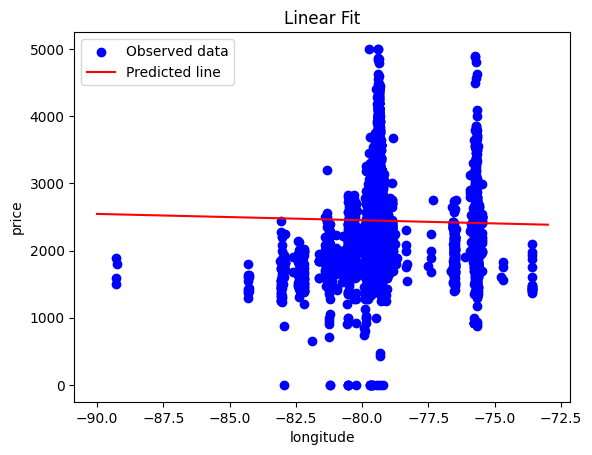

Training rsquared is  0.0007073461967915806


In [26]:
filtered_df = df[(df['sq_feet'] >= 500) & (df['sq_feet'] <= 1000) & (df['province'] ==7) & (df['price'] <=5000) ]
X = filtered_df[['longitude']].values 
y = filtered_df['price'].values
# Make linear regression object and fit the model 
model = LinearRegression()
model.fit(X, y)

# Make the scatter plot 
plt.scatter(filtered_df['longitude'], filtered_df['price'], color='blue', label='Observed data')

#Generate and plot the predicted values
sq_feet = np.arange(-90, -72.5).reshape(-1, 1)
predicted_price = model.predict(sq_feet)
# Calculate residuals, R2 and print it  
predicted_train = model.predict(X)
residuals = y - predicted_train
r_squared = r2_score(y, predicted_train)

plt.plot(sq_feet, predicted_price, color='red', label='Predicted line')
plt.xlabel('longitude')
plt.ylabel('price')
plt.title('Linear Fit')
plt.legend()
plt.show()
print('Training rsquared is ',r_squared)